In [50]:
import os
from pydub import AudioSegment
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# 将 m4a 格式转换为 wav 格式
def formatConvert(audio_path, audio_format):
    audio_name = os.path.splitext(audio_path)[0]
    audio = AudioSegment.from_file(audio_path, format=audio_format)
    audio.export(audio_name + ".wav", format="wav")

In [52]:
formatConvert("audio/one.m4a", "m4a")
formatConvert("audio/two.m4a", "m4a")
formatConvert("audio/six.m4a", "m4a")

In [53]:
def FFT(x):

    x = np.asarray(x, dtype=complex)
    N = len(x)
    assert N > 0 and (N & (N - 1)) == 0, "N must be a power of 2"
    
    if N <= 1:
        return x
    
    # X(k) = G(k) + e^(-2πk/N) H(k)
    G = FFT(x[0::2])     # g(r) = x(2r)
    H = FFT(x[1::2])      # h(r) = x(2r+1)
    
    # 旋转因子列表
    # W1, W2, ..., W(N/2-1)
    W = np.exp(-2j * np.pi * np.arange(N // 2) / N)
    
    # 
    X = np.zeros(N, dtype=complex)
    X[:N//2] = G + W * H
    X[N//2:] = G - W * H
    
    return X

汉明窗：

$$
w(n) = 0.5 (1 - cos(2\pi * n / (N-1)))
$$


In [54]:
# 计算 STFT
# y: 音频信号
# sr: 采样率
# win: 窗口大小
# step: 步长
def STFT(y, sr, win, step):
    # 分帧
    frames = []
    for i in range(0, len(y) - win, step):
        frame = np.hanning(win) * y[i:i + win]
        frames.append(frame)
    
    # 计算 STFT
    stft = []
    for frame in frames:
        # 计算 FFT
        fft = FFT(frame)
        stft.append(np.abs(fft[:win // 2 + 1])) # 幅值取绝对值，只关心正频率
    
    # 转置为 (频率, 时间) 形式
    return np.array(stft).T

In [ ]:
# 绘制语谱图
def Spectrogram(y, sr, win, step):
    # 计算 STFT
    spec = STFT(y, sr, win, step)
    specDB = 20 * np.log10(spec + 1e-10)  # 转换为分贝
    
    # 创建频率和时间轴
    freq_axes = np.arange(spec.shape[0]) * (sr / win)
    time_axes = np.arange(spec.shape[1]) * (step / sr)


    # 绘制频谱图
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(time_axes, freq_axes, specDB, shading='gouraud', cmap='viridis')
    plt.colorbar(label='Magnitude')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.tight_layout()
    plt.show()

In [56]:
sample_rate = 8000

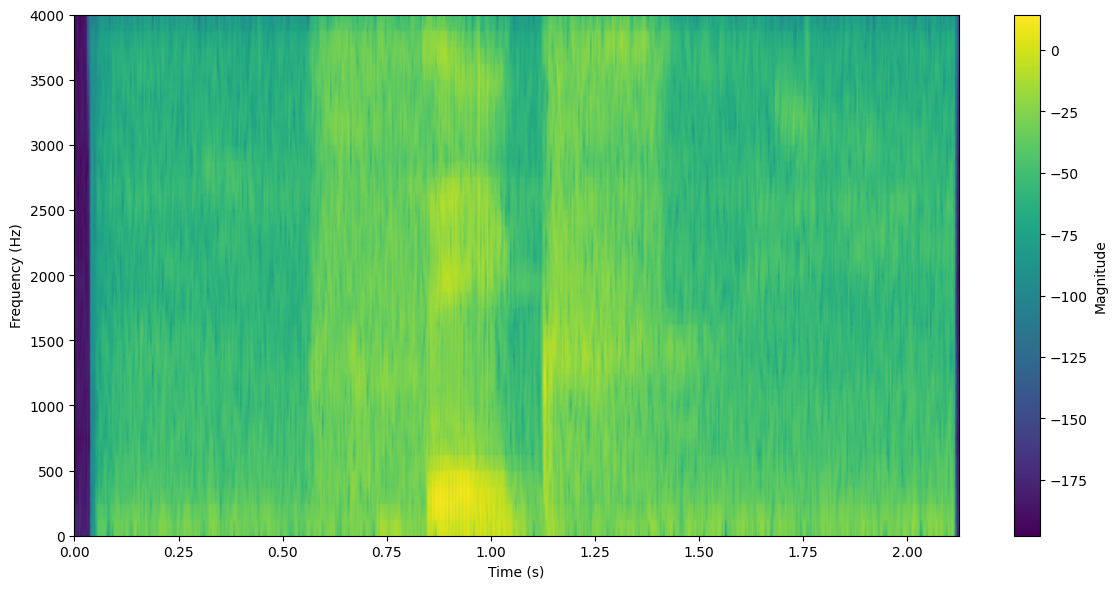

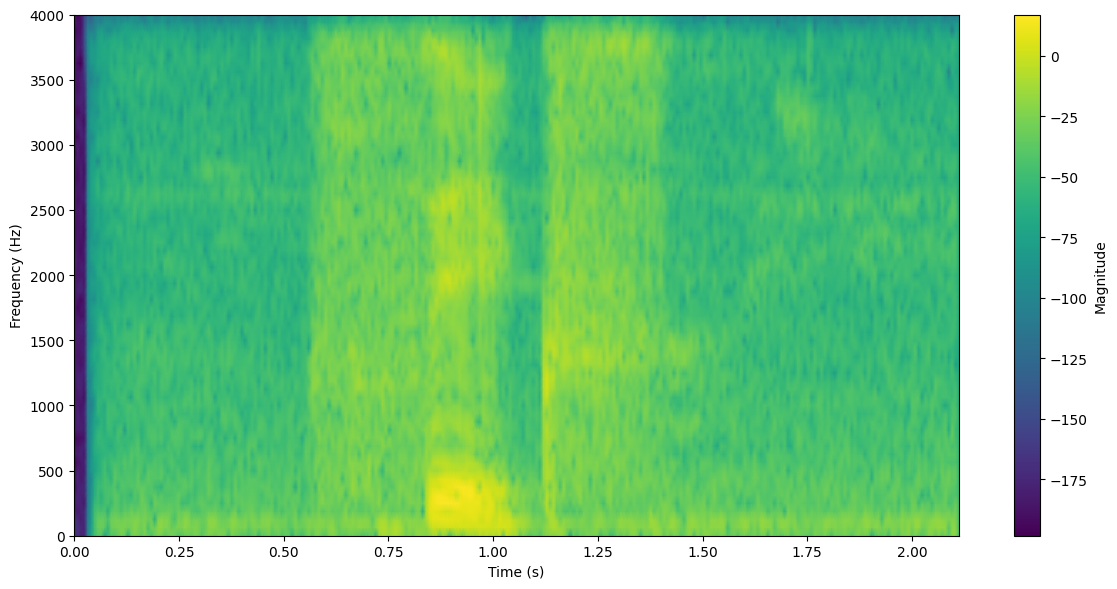

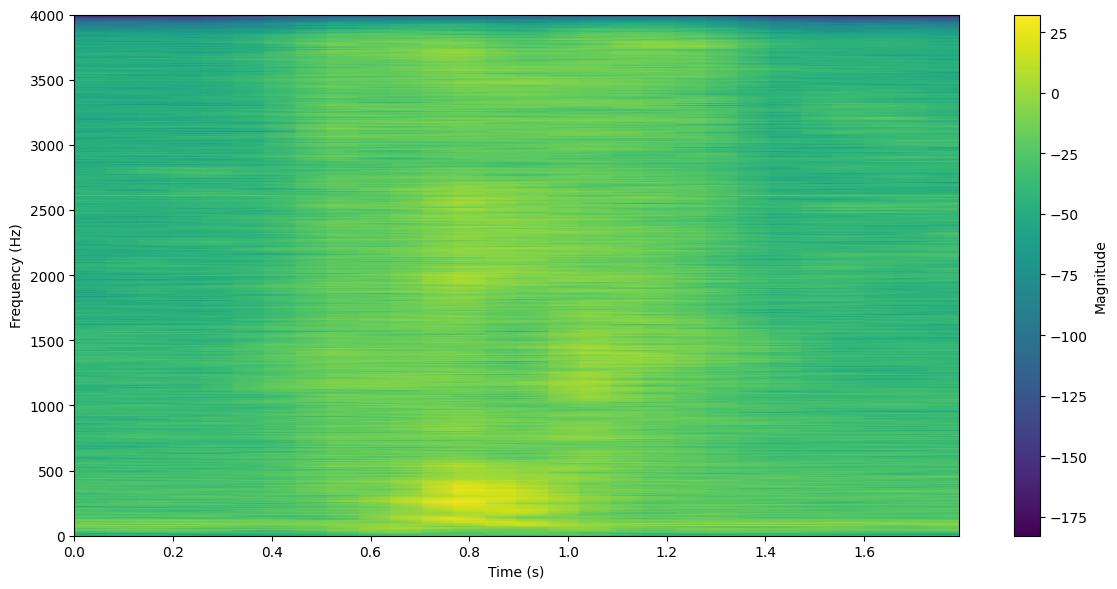

In [60]:
y, _ = librosa.load("audio/six.wav", sr=sample_rate)

# 5ms
win_size = int(sample_rate * 0.005)
win_size = 2 ** int(np.ceil(np.log2(win_size)))  # 向上取整为 2 的幂次
step_size = win_size // 2  # 重叠 50%
Spectrogram(y, sample_rate, win_size, step_size)

# 10ms
win_size = int(sample_rate * 0.01)
win_size = 2 ** int(np.ceil(np.log2(win_size)))  # 向上取整为 2 的幂次
step_size = win_size // 2  # 重叠 50%
Spectrogram(y, sample_rate, win_size, step_size)

# 15ms
win_size = int(sample_rate * 0.15)
win_size = 2 ** int(np.ceil(np.log2(win_size)))  # 向上取整为 2 的幂次
step_size = win_size // 2  # 重叠 50%
Spectrogram(y, sample_rate, win_size, step_size)